In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

In [7]:
df = pd.read_csv("Dataset/IMDb_Movies_India.csv",encoding='ISO-8859-1')
df.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [8]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [12]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(5659, 10)

In [23]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [24]:
df.describe()

Year     Duration       Rating          Votes
count  5659.000000  5659.000000  5659.000000    5659.000000
mean   1996.247570   133.439124     5.898533    2697.649585
std      19.741839    25.319939     1.381165   13651.503584
min    1931.000000    21.000000     1.100000       5.000000
25%    1983.000000   119.000000     5.000000      30.000000
50%    2002.000000   135.000000     6.100000     131.000000
75%    2013.000000   150.000000     6.900000     922.500000
max    2021.000000   321.000000    10.000000  591417.000000

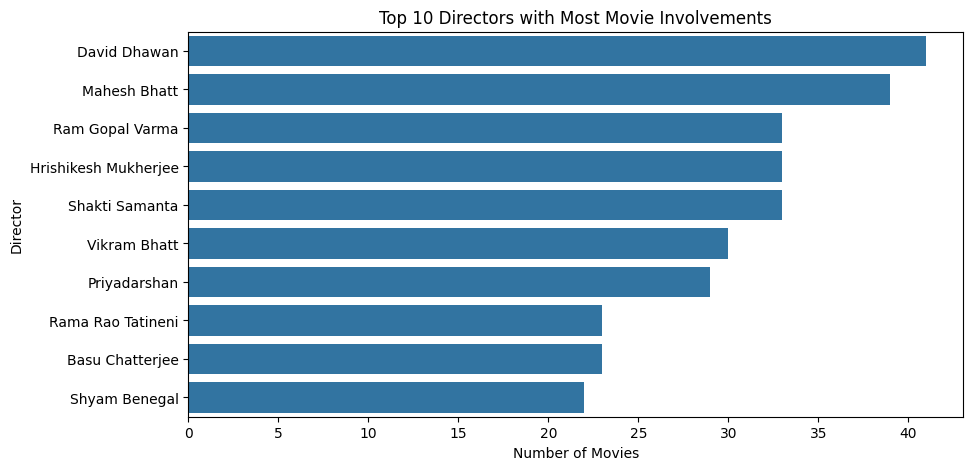

In [28]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index)
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [33]:
df['Genre_split'] = df['Genre'].str.split(', ')

In [32]:
one_hot = OneHotEncoder(sparse_output=False)
encoded_array = one_hot.fit_transform(df[['Genre']])
one_hot_df = pd.DataFrame(encoded_array, 
                          columns=one_hot.get_feature_names_out(['Genre']))
one_hot_df

Genre_Action  Genre_Action, Adventure  \
0              0.0                      0.0   
1              0.0                      0.0   
2              0.0                      0.0   
3              0.0                      0.0   
4              0.0                      0.0   
...            ...                      ...   
5654           0.0                      0.0   
5655           0.0                      0.0   
5656           0.0                      0.0   
5657           0.0                      0.0   
5658           0.0                      0.0   

      Genre_Action, Adventure, Biography  Genre_Action, Adventure, Comedy  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   
2                                    0.0                              0.0   
3                                    0.0                              0.0   
4                                    0.0                              0.0   
...                                  ...                              ...   
5654                                 0.0                              0.0   
5655                                 0.0                              0.0   
5656                                 0.0                              0.0   
5657                                 0.0                              0.0   
5658                                 0.0                              0.0   

      Genre_Action, Adventure, Crime  Genre_Action, Adventure, Drama  \
0                                0.0                             0.0   
1                                0.0                             0.0   
2                                0.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   
...                              ...                             ...   
5654                             0.0                             0.0   
5655                             0.0                             0.0   
5656                             0.0                             0.0   
5657                             0.0                             0.0   
5658                             0.0                             0.0   

      Genre_Action, Adventure, Family  Genre_Action, Adventure, Fantasy  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
...                               ...                               ...   
5654                              0.0                               0.0   
5655                              0.0                               0.0   
5656                              0.0                               0.0   
5657                              0.0                               0.0   
5658                              0.0                               0.0   

      Genre_Action, Adventure, History  Genre_Action, Adventure, Horror  ...  \
0                                  0.0                              0.0  ...   
1                                  0.0                              0.0  ...   
2                                  0.0                              0.0  ...   
3                                  0.0                              0.0  ...   
4                                  0.0                              0.0  ...   
...                                ...                              ...  ...   
5654                               0.0                              0.0  ...   
5655                               0.0                              0.0  ...   
5656                          